## Introduction

Bangalore is the capital and largest city of the Indian state of Karnataka. With a population of over 15 million, Bangalore is the third largest city in India and 27th largest city in the world.

Bangalore has a unique food culture. Restaurants from all over the world can be found here in Bangalore, with various kind of cuisines.With each day new restaurants adding up to the industry and the demand is increasing day by day so it is useful to get some interesting facts and figures about the restaurants.

## Import Libraries

In [1]:
# Import libraries

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
import category_encoders as ce
from pandas import set_option
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
import pycountry_convert as pc
from wordcloud import WordCloud
import ast
from colour import Color
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,  TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
# Import the function files

import sys
sys.path.insert(0, '../DS_module3/functions')

from functions_plot_EDA import *
from Functions_ML_classification_1 import *
from classification_functions import *

## Load Datasets

In [3]:
# Dataset 1: contains geographical coordinates of Bangalore neighborhoods

df_loc = pd.read_csv("../Bi_module3/P3. locations.csv")
df_loc

,Name,geo_loc
0,Bangalore Banashankari,"(12.9152208, 77.573598)"
1,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Bangalore Mysore Road,"(12.9314092, 77.5067138)"
3,Bangalore Jayanagar,"(12.9292731, 77.5824229)"
4,Bangalore Kumaraswamy Layout,"(12.9068169, 77.5635247362134)"
...,...,...
89,Bangalore West Bangalore,"(12.9791198, 77.5912997)"
90,Bangalore Magadi Road,"(12.9858515, 77.486927)"
91,Bangalore Yelahanka,"(13.1006982, 77.5963454)"
92,Bangalore Sahakara Nagar,"(13.0621474, 77.580061354805)"


In [4]:
# Dataset 2: contains rating and reviews about Bangalore restaurants

df_rat = pd.read_csv("../Bi_module3/P3. ratings.csv")
df_rat

,Unnamed: 0,name,rating,review
0,0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,1,Jalsa,4.0,I was here for dinner with my family on a week...
2,2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,4,Jalsa,5.0,The best thing about the place is its ambiance...
...,...,...,...,...
1319963,1319963,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,My review based on food drink service\n\nFood ...
1319964,1319964,Chime - Sheraton Grand Bengaluru Whitefield Ho...,5.0,I visited chime bar at Sheraton hotel it was n...
1319965,1319965,Chime - Sheraton Grand Bengaluru Whitefield Ho...,4.0,This restaurant is situated inside grand Shera...
1319966,1319966,The Nest - The Den Bengaluru,5.0,Great ambience looking nice good selection of...


In [5]:
# Dataset 3: contains data from Zomato, an Indian restaurant aggregator and food delivery service

df_zom = pd.read_csv("../Bi_module3/P3. zomato.csv")
df_zom

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


## EDA & Data Cleaning

### Dataset 1 - Locations

In [6]:
df_loc.head()

,Name,geo_loc
0,Bangalore Banashankari,"(12.9152208, 77.573598)"
1,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Bangalore Mysore Road,"(12.9314092, 77.5067138)"
3,Bangalore Jayanagar,"(12.9292731, 77.5824229)"
4,Bangalore Kumaraswamy Layout,"(12.9068169, 77.5635247362134)"


In [7]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     94 non-null     object
 1   geo_loc  88 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [8]:
# Check duplicates

df_loc.duplicated().sum()

0

In [9]:
# Create a function to see the total of NaNs and its percentage on the total of data

def missing_percentage(df, percentage):

    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    missingdata = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    return missingdata[missingdata.Percent > percentage]

In [10]:
# Check NaNs with the function created

missing_percentage(df_loc, 0)

,Total,Percent
geo_loc,6,6.38


In [11]:
# Drop NaNs. The coordinates are the only data useful in this dataset and without them, it's useless information

df_loc.dropna(inplace=True)

In [12]:
# Explore the Name column

df_loc.Name.nunique()

88

In [13]:
# All those are Bangalore neighborhoods

df_loc.Name.value_counts()

Bangalore Hennur                  1
Bangalore Kalyan Nagar            1
Bangalore Thippasandra            1
Bangalore North Bangalore         1
Bangalore Richmond Road           1
                                 ..
Bangalore East Bangalore          1
Bangalore Whitefield              1
Bangalore Lavelle Road            1
Bangalore Rajarajeshwari Nagar    1
Bangalore Rajajinagar             1
Name: Name, Length: 88, dtype: int64

### Dataset 2 - Ratings

In [14]:
df_rat.head()

,Unnamed: 0,name,rating,review
0,0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,1,Jalsa,4.0,I was here for dinner with my family on a week...
2,2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,4,Jalsa,5.0,The best thing about the place is its ambiance...


In [15]:
df_rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319968 entries, 0 to 1319967
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1319968 non-null  int64  
 1   name        1319968 non-null  object 
 2   rating      1319968 non-null  float64
 3   review      1316924 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 40.3+ MB


In [16]:
# Check duplicates

df_rat.duplicated().sum()

0

In [17]:
# Check NaNs

missing_percentage(df_rat, 0)

,Total,Percent
review,3044,0.23


In [18]:
# Rename a column

df_rat.rename(columns = {'Unnamed: 0':'id'}, inplace = True) 

# df_rat.drop("Unnamed: 0", axis=1, inplace=True)

In [19]:
# Explore the Name column - there are quite some restaurants that have more than one rate or review

df_rat.name.nunique()

7041

In [20]:
df_rat.name.value_counts()

Hammered               11894
Mast Kalandar           9147
Truffles                8783
Onesta                  7656
Crawl Street            6498
                       ...  
Sri Mahadev Sweets         1
House of Mandarin          1
Burger Man                 1
SKS Veg Corner             1
Campus Juice Corner        1
Name: name, Length: 7041, dtype: int64

#### Ratings per restaurant

In [21]:
# How many ratings did each restaurant have?

user_freq = df_rat[['id', 'name']].groupby('name').count().reset_index()
user_freq.columns = ['Restaurant', 'N_ratings']
user_freq.sort_values(by='N_ratings', ascending=False)

,Restaurant,N_ratings
2472,Hammered,11894
3778,Mast Kalandar,9147
6612,Truffles,8783
4435,Onesta,7656
1559,Crawl Street,6498
...,...,...
2130,Food Lounge,1
2119,Food Box Cafe,1
6561,Tiffun,1
3971,Mothi Family Restaurant,1


#### Bayesian average

In [22]:
# Calculate the count and the mean of each restaurant rating

rate_stats = df_rat.groupby('name')[['rating']].agg(['count', 'mean'])
rate_stats.columns = rate_stats.columns.droplevel()

rate_stats.head().sort_values(by='mean', ascending=False)

,count,mean
name,,
#Vibes Restro,3,5.000000
#FeelTheROLL,8,4.875000
1 Fahreheit,2,4.500000
#L-81 Cafe,35,4.257143
#refuel,6,3.250000


Apparently the best rated restaurant is "Vibes retro". In fact, it has a rating of 5/5. Still, it only got 3 reviews which is a very low quantity. For this reason, the rating has not the same "importance" or weight as if it was rated by much more people. In this case, in order to have a more objective estimate it is useful to rely on the Bayesian average.

In [23]:
# Create a function to calculate the Bayesian average 

C = rate_stats['count'].mean()
m = rate_stats['mean'].mean()

def bayesian_avg(ratings_i):
    bayesian_avg = (C*m+ratings_i.sum())/(C+ratings_i.count())
    return bayesian_avg

In [24]:
# Apply it to the dataset

bayesian_avg_ratings = df_rat.groupby('name')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['name', 'bayesian_avg']
bayesian_avg_ratings.head().sort_values(by='bayesian_avg', ascending=False)

,name,bayesian_avg
1,#L-81 Cafe,3.740356
0,#FeelTheROLL,3.694259
2,#Vibes Restro,3.665232
4,1 Fahreheit,3.652910
3,#refuel,3.631657


#### Sparse matrix

In [25]:
from scipy.sparse import csr_matrix

def create_X(df):

    N = df_rat['id'].nunique()
    M = df_rat['name'].nunique()

    user_mapper = dict(zip(np.unique(df_rat['id']), list(range(N))))
    rest_mapper = dict(zip(np.unique(df_rat['name']), list(range(M))))
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df_rat['id'])))
    rest_inv_mapper = dict(zip(list(range(M)), np.unique(df_rat['name'])))
    
    user_index = [user_mapper[i] for i in df_rat['id']]
    rest_index = [rest_mapper[i] for i in df_rat['name']]

    X = csr_matrix((df_rat["rating"], (rest_index, user_index)), shape=(M, N))
    
    return X, user_mapper, rest_mapper, user_inv_mapper, rest_inv_mapper

In [26]:
X, user_mapper, rest_mapper, user_inv_mapper, rest_inv_mapper = create_X(df_rat)

In [27]:
density = X.count_nonzero()/(X.shape[0]*X.shape[1])

print(f"Matrix density: {round(density*100,2)}%")

Matrix density: 0.01%


The density of our sparse matrix is too low to use it for a reliable recommender system...

### Dataset 3 - Zomato

In [28]:
df_zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Columns description:

- url - the url of the restaurant in the zomato website
- address - the address of the restaurant in Bengaluru
- name - the name of the restaurant
- online_order - whether online ordering is available or not
- book_table - table book option available or not
- rate - the overall rating of the restaurant (out of 5)
- votes - total number of ratings for the restaurant
- phone - telephone number of the restaurant
- location - the neighborhood in which the restaurant is located
- rest_type - restaurant type
- dish_liked - dishes people liked in the restaurant
- cuisines - food styles separated by comma
- approx_cost(for two people) - the approximate cost for a meal for two people
- reviews_list - list of tuples, each tuple consists of two values, rating and review by the customer
- menu_item - contains list of menus available in the restaurant
- listed_in(type) - type of meal
- listed_in(city) - the neighborhood in which the restaurant is listed

In [29]:
df_zom.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [30]:
# Check duplicates

df_zom.duplicated().sum()

0

In [31]:
# Drop unnecessary columns - not useful in this analysis

df_zom.drop(["url", "phone"], axis=1, inplace=True)

In [32]:
# Check NaNs

missing_percentage(df_zom, 0)

,Total,Percent
dish_liked,28078,54.29
rate,7775,15.03
approx_cost(for two people),346,0.67
rest_type,227,0.44
cuisines,45,0.09
location,21,0.04


In [33]:
# Half of the values in the dish_liked column are null so we drop the column

df_zom.drop(["dish_liked"], axis=1, inplace=True)

#### `Online order` column

In [34]:
# Convert binary columns to booleans for better manipulation

df_zom.online_order.replace(('Yes','No'),(True,False),inplace =True)

#### `Book table` column

In [35]:
# Convert binary columns to booleans for better manipulation

df_zom.book_table.replace(('Yes','No'),(True,False),inplace =True)

#### `Menu item` column

In [36]:
# Check the menu_item column. There are many empty values here

df_zom.menu_item.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [37]:
# Substitute the empty values in the column with NaNs

df_zom.menu_item.replace('[]', np.nan, inplace =True)

In [38]:
# Check again NaNs. As we can see, most values in the menu_item column are null

missing_percentage(df_zom, 0)

,Total,Percent
menu_item,39617,76.60
rate,7775,15.03
approx_cost(for two people),346,0.67
rest_type,227,0.44
cuisines,45,0.09
location,21,0.04


In [39]:
# Drop the column as it's not providing enough useful information for this analysis

df_zom.drop("menu_item", axis=1, inplace=True)

#### `Approx cost` column

In [40]:
# Manipulate the cost column and transform it from object to numerical

df_zom["approx_cost(for two people)"].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
560         1
469         1
160         1
60          1
5,000       1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [41]:
# Remove the comma - in this case it's used represent the K, not the decimals, so we drop it

df_zom["cost_2_pax"] = df_zom["approx_cost(for two people)"].str.replace(",", "")

df_zom.drop("approx_cost(for two people)", axis=1, inplace=True)

In [42]:
df_zom["cost_2_pax"].value_counts()

300     7576
400     6562
500     4980
200     4857
600     3714
        ... 
160        1
560        1
469        1
60         1
5000       1
Name: cost_2_pax, Length: 70, dtype: int64

In [43]:
# Convert the currency column from object type to float

df_zom["cost_2_pax"] = df_zom["cost_2_pax"].astype('float')

In [44]:
# Looks fine now

df_zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51717 non-null  object 
 1   name             51717 non-null  object 
 2   online_order     51717 non-null  bool   
 3   book_table       51717 non-null  bool   
 4   rate             43942 non-null  object 
 5   votes            51717 non-null  int64  
 6   location         51696 non-null  object 
 7   rest_type        51490 non-null  object 
 8   cuisines         51672 non-null  object 
 9   reviews_list     51717 non-null  object 
 10  listed_in(type)  51717 non-null  object 
 11  listed_in(city)  51717 non-null  object 
 12  cost_2_pax       51371 non-null  float64
dtypes: bool(2), float64(1), int64(1), object(9)
memory usage: 4.4+ MB


In [45]:
# Replace NaNs in this column with the average

df_zom['cost_2_pax'].fillna(df_zom['cost_2_pax'].mean(), inplace=True)

In [46]:
df_zom['cost_2_pax'].value_counts()

300.0     7576
400.0     6562
500.0     4980
200.0     4857
600.0     3714
          ... 
560.0        1
60.0         1
160.0        1
469.0        1
3700.0       1
Name: cost_2_pax, Length: 71, dtype: int64

#### `Rate` column

In [47]:
# Manipulate the rate column - it's an object but for the analysis we need to transform it to a numerical type

df_zom.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [48]:
# Remove the "/5" in the rate column

df_zom.rate = df_zom.rate.astype('str')
df_zom.rate = df_zom.rate.apply(lambda x: x.replace('/5','').strip())
df_zom.rate = df_zom.rate.apply(lambda x: x.replace(' /5','').strip())

In [49]:
# Replace not rated restaurants (those with "NEW" & "-") to NaNs

df_zom.rate.replace(('NEW','-',"nan"), np.nan, inplace =True)

In [50]:
# Seems ok now

df_zom.rate.isna().value_counts()

False    41665
True     10052
Name: rate, dtype: int64

In [51]:
# Convert datatype to a float

df_zom.rate = df_zom["rate"].astype('float')

In [52]:
# Almost 20% of the restaurants are not rated

missing_percentage(df_zom, 0)

,Total,Percent
rate,10052,19.44
rest_type,227,0.44
cuisines,45,0.09
location,21,0.04


In [53]:
# We eventually replace the Nans with "unrated" to be able to manipulate the data

# df_zom.rate = df_zom.rate.fillna("unrated")

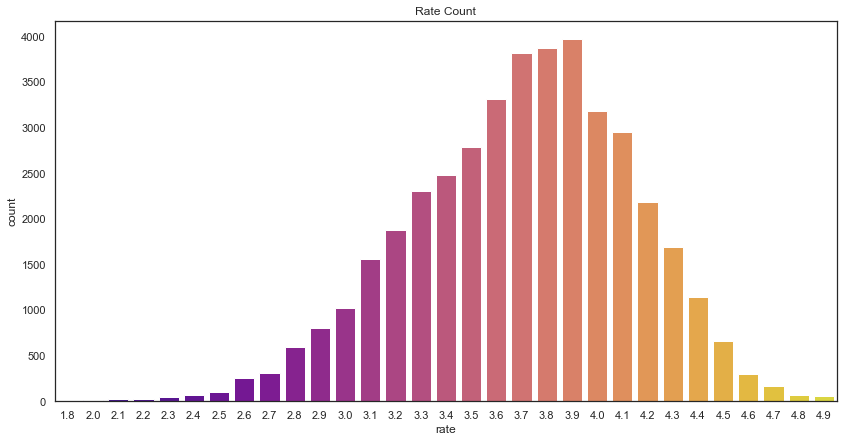

In [54]:
# Plot the count of ratings

plt.rcParams['figure.figsize'] = 14,7
sns.countplot(df_zom["rate"].sort_values(), palette="plasma")
plt.title("Rate Count")
plt.show()

#### `Location` column

In [55]:
# Manipulate the location column - there are a few NaNs here. Let's see what can be done

df_zom[(df_zom.location.isnull())].filter(items=['address', 'location', 'listed_in(city)'])

,address,location,listed_in(city)
1662,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",NaN,Bannerghatta Road
9874,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",NaN,BTM
13693,"Chandapura- Anakal Main Road, Oppsite Vemana H...",NaN,Electronic City
16351,"Kudlu Gate, Bommanahalli, Bangalore",NaN,HSR
26432,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",NaN,Kammanahalli
26519,"Koramangala 8th Block, Bangalore",NaN,Koramangala 4th Block
27672,"6, Kathalipalya Village, 6th Cross, Koramangal...",NaN,Koramangala 4th Block
28611,"6, Kathalipalya Village, 6th Cross, Koramangal...",NaN,Koramangala 4th Block
29298,"Koramangala 8th Block, Bangalore",NaN,Koramangala 5th Block
30604,"6, Kathalipalya Village, 6th Cross, Koramangal...",NaN,Koramangala 5th Block


In [56]:
df_zom[["address", "location", "listed_in(city)"]]

,address,location,listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Banashankari,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Banashankari,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Banashankari,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Banashankari,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Basavanagudi,Banashankari
...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Whitefield,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Whitefield,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Whitefield,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,"ITPL Main Road, Whitefield",Whitefield


In [57]:
# Extend column width to see the full address

pd.options.display.max_colwidth = 100

In [58]:
df_zom[["address", "location", "listed_in(city)"]].head(30)

,address,location,listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Banashankari,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Banga...",Banashankari,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore",Banashankari,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore",Banashankari,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi,...",Basavanagudi,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar Main Road, Basavanagudi, Bangalore",Basavanagudi,Banashankari
6,"19/1, New Timberyard Layout, Beside Satellite Bus Stop, Mysore Road, Bangalore",Mysore Road,Banashankari
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Complex, 2nd Stage, Banashankari, Bangalore",Banashankari,Banashankari
8,"1, 30th Main Road, 3rd Stage, Banashankari, Bangalore",Banashankari,Banashankari
9,"2470, 21 Main Road, 25th Cross, Banashankari, Bangalore",Banashankari,Banashankari


In [59]:
# Fill the nulls in the location column with the values in the listed_in column as they seem reliable

df_zom.location.fillna(df_zom["listed_in(city)"],inplace=True)

In [60]:
df_zom.location.isna().value_counts()

False    51717
Name: location, dtype: int64

In [61]:
# We finally drop the listed_in_city column to not have duplicated information

df_zom.drop("listed_in(city)", axis=1, inplace=True)

In [62]:
# Return to the original column width 

pd.options.display.max_colwidth = 50

In [63]:
df_zom.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,800.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,800.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,800.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,300.0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,600.0


#### `Name` column

In [64]:
df_zom.name.nunique()

8792

In [65]:
# There are various places with the same name - they probably are part of restaurant/coffee chains

df_zom.name.value_counts()

Cafe Coffee Day        96
Onesta                 85
Just Bake              73
Empire Restaurant      71
Five Star Chicken      70
                       ..
UK Foods                1
Hunan King's            1
Deepak Fast Food        1
Shree Ganesha Hotel     1
Dtink Lab               1
Name: name, Length: 8792, dtype: int64

In [66]:
# Indeed - they have different addresses. We will treat them as different places

df_zom.loc[df_zom['name'] == "Cafe Coffee Day"] 

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
22,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,False,False,3.6,28,Banashankari,Cafe,"Cafe, Fast Food","[('Rated 4.0', 'RATED\n This outlet is better...",Cafes,900.0
254,"28th Main, 8th Block, Jayanagar, Bangalore",Cafe Coffee Day,True,False,3.2,17,Jayanagar,Cafe,"Cafe, Fast Food","[('Rated 5.0', 'RATED\n Delicious mouthwateri...",Delivery,900.0
625,"21st Main Road, Next to Deva Gowda Petrol Pump...",Cafe Coffee Day,False,False,NaN,0,Banashankari,Cafe,"Cafe, Fast Food","[('Rated 4.0', 'RATED\n Had ordered devil?s o...",Dine-out,900.0
889,"Gopalan Innovation Mall, Bannerghatta Road, Ba...",Cafe Coffee Day,False,False,3.6,19,Bannerghatta Road,Cafe,"Cafe, Fast Food","[('Rated 4.0', ""RATED\n It is Okay place. Thi...",Cafes,900.0
1186,"524, 60 Feet Road,Vijaya Bank Layout, Opposite...",Cafe Coffee Day,True,False,3.7,26,Bannerghatta Road,Cafe,"Cafe, Fast Food","[('Rated 3.0', 'RATED\n What can someone writ...",Delivery,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49691,"1570, Vinutha Tower, HSR Layout, Sector 1, Hos...",Cafe Coffee Day,True,False,3.1,13,Sarjapur Road,Cafe,"Cafe, Fast Food","[('Rated 4.0', 'RATED\n Bestest place for all...",Dine-out,900.0
50119,"SH 35, Global Ventures, Whitefield Main Road, ...",Cafe Coffee Day,True,False,3.6,45,Whitefield,Cafe,Cafe,"[('Rated 3.0', 'RATED\n Ordered a couple of W...",Cafes,650.0
50282,"SH 35, Global Ventures, Whitefield Main Road, ...",Cafe Coffee Day,True,False,3.6,45,Whitefield,Cafe,Cafe,"[('Rated 3.0', 'RATED\n Ordered a couple of W...",Delivery,650.0
51004,"186/26, Ground Floor, Badavala Nagar, B Naraya...",Cafe Coffee Day,False,False,NaN,0,Whitefield,Cafe,"Cafe, Fast Food",[],Desserts,900.0


#### `Address` column

In [67]:
# Seems that we have duplicate addresses - how is it even possible for two places to share the same address?

df_zom.address.duplicated().value_counts()

True     40222
False    11495
Name: address, dtype: int64

In [68]:
# Look further into this column

df_zom[df_zom.duplicated(subset=['address'], keep=False)]

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,800.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,800.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,800.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,300.0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,1500.0
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,False,False,NaN,0,Whitefield,Bar,Finger Food,[],Pubs and bars,600.0
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,False,False,NaN,0,Whitefield,Bar,Finger Food,[],Pubs and bars,2000.0
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,2500.0


In [69]:
pd.options.display.max_colwidth = 100

In [70]:
# Let's see for example how many Jalsa places we have with the same address, and in what they differ

df_zom[df_zom.name == 'Jalsa']

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
0,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",Buffet,800.0
456,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",Delivery,800.0
559,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",Dine-out,800.0
2488,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",Buffet,800.0
2966,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",Delivery,800.0
3462,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,804,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n Super ambience\nGreat food with spicy touch.\nAverage service.\nBest fo...",Dine-out,800.0
7607,"25/7, Doddannakundi, Outer Ring Road, Mahadevapura, Marathahalli, Bangalore",Jalsa,True,True,4.2,2173,Marathahalli,Casual Dining,"North Indian, Mughlai","[('Rated 4.0', 'RATED\n A pretty decent place to eat Mughal cuisine. Everything inside and outs...",Delivery,1500.0
19401,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,783,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",Buffet,800.0
20399,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,783,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",Delivery,800.0
21302,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,783,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",Dine-out,800.0


In [71]:
df_zom.shape

(51717, 12)

In [72]:
# Seems there are differences in the listed_in column and in the number of votes.

# For the extent of this analysis, we drop duplicates and keep the first

df_zom.drop_duplicates(subset=["address"], keep='first', inplace=True)

In [73]:
df_zom.shape

(11495, 12)

#### `Listed in` column

In [74]:
df_zom["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [75]:
len(df_zom["listed_in(type)"])

11495

In [76]:
types = df_zom["listed_in(type)"].value_counts()
types

Delivery              8042
Dine-out              2057
Cafes                  556
Desserts               526
Buffet                 289
Pubs and bars           19
Drinks & nightlife       6
Name: listed_in(type), dtype: int64

In [77]:
# Create a function to calculate a frequency table

def values_perc(series, rowsnumber):
    df = pd.DataFrame(series)
    results = []
    for i in series:
            results.append(round(i/rowsnumber*100,2))
    df["percentage"] = results       
    return df

In [78]:
# Half of the restaurants are labeled as a place that offers delivery service

values_perc(types, 51717)

,listed_in(type),percentage
Delivery,8042,15.55
Dine-out,2057,3.98
Cafes,556,1.08
Desserts,526,1.02
Buffet,289,0.56
Pubs and bars,19,0.04
Drinks & nightlife,6,0.01


In [79]:
# Plot the listed restaurant types

trace1 = go.Bar(
    x = df_zom['listed_in(type)'].value_counts().keys(),
    y = df_zom['listed_in(type)'].value_counts())
data1 = [trace1]
layout = go.Layout(barmode = "group",
                   yaxis=dict(title="Number of Restaurants"))
fig = go.Figure(data = data1, layout = layout)
fig.show()

#### `Rest type` column

In [80]:
# Drop null values as they are few (0.44% of the dataset)

df_zom.dropna(subset=["rest_type"], inplace=True)

In [81]:
# Check 

df_zom["rest_type"].isnull().sum()

0

In [82]:
df_zom["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Casual Dining, Bar',
       'Dessert Parlor, Beverage Shop', 'Quick Bites, Bakery',
       'Dessert Parlor, Quick Bites', 'Microbrewery, Casual Dining',
       'Lounge', 'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery',
       'Dhaba', 'Pub, Casual Dining', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Food Court

In [83]:
df_zom["rest_type"].value_counts()

Quick Bites                  4815
Casual Dining                2133
Delivery                      733
Takeaway, Delivery            581
Cafe                          533
                             ... 
Pop Up                          1
Bar, Pub                        1
Bakery, Kiosk                   1
Casual Dining, Sweet Shop       1
Lounge, Microbrewery            1
Name: rest_type, Length: 88, dtype: int64

In [84]:
# Do some cleaning

df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Cafe' if 'Cafe' in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Quick Bites' if 'Quick Bites' in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: "Dessert Parlor" if "Dessert Parlor" in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Casual Dining' if 'Casual Dining' in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Pub' if 'Microbrewery' in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Bakery' if 'Bakery' in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Delivery' if 'Delivery' in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Fine Dining' if 'Fine Dining' in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Food Court' if 'Food Court' in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Bar' if 'Bar' in x else x)
df_zom["rest_type"] = df_zom["rest_type"].apply(lambda x: 'Sweet Shop' if 'Confectionery' in x else x)

In [85]:
# Looks better now

df_zom["rest_type"].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Pub', 'Bakery', 'Fine Dining', 'Beverage Shop',
       'Sweet Shop', 'Bar', 'Kiosk', 'Food Truck', 'Takeaway', 'Lounge',
       'Food Court', 'Dhaba', 'Club', 'Bhojanalya', 'Pop Up'],
      dtype=object)

In [86]:
df_zom["rest_type"].value_counts()

Quick Bites       5146
Casual Dining     2406
Delivery          1314
Cafe               692
Dessert Parlor     631
Bakery             310
Beverage Shop      239
Food Court         137
Sweet Shop         132
Bar                 84
Mess                75
Pub                 64
Kiosk               59
Fine Dining         41
Takeaway            35
Lounge              34
Food Truck          27
Dhaba                8
Club                 2
Pop Up               1
Bhojanalya           1
Name: rest_type, dtype: int64

#### `Cuisines` column

In [87]:
# Drop the few NaNs in this column

df_zom.dropna(subset=["cuisines"], inplace=True)

In [88]:
missing_percentage(df_zom, 0)

,Total,Percent
rate,2842,24.86


After all the data cleaning we just have a few NaNs in the "rate" column.

#### `Reviews list`column

In [89]:
# Create a new column called “reviews rate” with the rate extracted from the other column

df_zom["reviews_rate"] = df_zom["reviews_list"].str.extract(r'(\d+)')

In [90]:
df_zom.reviews_rate

0          4
1          4
2          3
3          4
4          4
        ... 
51614      1
51627    NaN
51628      2
51632      4
51677      4
Name: reviews_rate, Length: 11432, dtype: object

In [91]:
# Convert this column from object to float

df_zom.reviews_rate = df_zom["reviews_rate"].astype('float')

In [92]:
df_zom.reviews_rate

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51614    1.0
51627    NaN
51628    2.0
51632    4.0
51677    4.0
Name: reviews_rate, Length: 11432, dtype: float64

In [93]:
# Fill the NaNs and finally drop the newly created column

df_zom.rate.fillna(df_zom.reviews_rate, inplace=True)

df_zom.drop("reviews_rate", axis=1, inplace=True)

In [94]:
# We have less NaNs now - the percentage dropped from 19% to 12%

missing_percentage(df_zom, 0)

,Total,Percent
rate,1952,17.07


In [95]:
# Will drop these NaNs

df_zom.rate.dropna(inplace=True)

##### Text preprocessing

Let's further clean the reviews_list column. The following steps will be applied:

- Lower casing
- Removal of punctuations
- Removal of strange characters
- Removal of stopwords
- Removal of numbers

In [96]:
#df_zom.reviews_list.str.split(",")

In [97]:
# Lower casing

df_zom["reviews_list"] = df_zom["reviews_list"].str.lower()

In [98]:
# Remove punctuation

# df_zom["reviews_list"].apply(word_tokenize) ---> this was taking hours so i found an alternative

import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [99]:
df_zom["reviews_list"] = df_zom["reviews_list"].apply(lambda text: remove_punctuation(text))

In [100]:
df_zom.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
0,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",rated 40 ratedn a beautiful place to dine inthe interiors take you back to the mughal era the l...,Buffet,800.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Banga...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",rated 40 ratedn had been here for dinner with family turned out to be a good choose suitable fo...,Buffet,800.0
2,"1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore",San Churro Cafe,True,False,3.8,918,Banashankari,Cafe,"Cafe, Mexican, Italian",rated 30 ratedn ambience is not that good enough and its not a pocket friendly cafe and the qua...,Buffet,800.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",rated 40 ratedn great food and proper karnataka style full meals been there twice and was fully...,Buffet,300.0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi,...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",rated 40 ratedn very good restaurant in neighbourhood buffet system is properly arranged variet...,Buffet,600.0


In [101]:
# Remove stopwords words and special characters

df_zom["reviews_list"] = df_zom["reviews_list"].str.replace('ratedn','')
df_zom["reviews_list"] = df_zom["reviews_list"].str.replace('rated','')

stop_words = stopwords.words('english')

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word.isalpha() and word not in stop_words])

In [102]:
# Add some more specific stopwords for this case

stop_words.extend(["place", "food", "one", "also", "restaurant"])

In [103]:
df_zom["reviews_list"] = df_zom["reviews_list"].apply(lambda text: remove_stopwords(text))

In [104]:
df_zom.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
0,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",beautiful dine inthe interiors take back mughal era lightings perfectwe went occasion christmas ...,Buffet,800.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Banga...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",dinner family turned good choose suitable ages people try liked starters service good prices aff...,Buffet,800.0
2,"1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore",San Churro Cafe,True,False,3.8,918,Banashankari,Cafe,"Cafe, Mexican, Italian",ambience good enough pocket friendly cafe quantity good desserts good enough nwent quick bite fr...,Buffet,800.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",great proper karnataka style full meals twice fully satisfied give stars well managed reached sa...,Buffet,300.0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi,...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",good neighbourhood buffet system properly arranged variety dishes along garba dance puppet show ...,Buffet,600.0


In [105]:
# Remove number

df_zom["reviews_list"] = df_zom["reviews_list"].str.replace(r'\d+', '')

In [106]:
df_zom.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
0,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",beautiful dine inthe interiors take back mughal era lightings perfectwe went occasion christmas ...,Buffet,800.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Banga...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",dinner family turned good choose suitable ages people try liked starters service good prices aff...,Buffet,800.0
2,"1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore",San Churro Cafe,True,False,3.8,918,Banashankari,Cafe,"Cafe, Mexican, Italian",ambience good enough pocket friendly cafe quantity good desserts good enough nwent quick bite fr...,Buffet,800.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",great proper karnataka style full meals twice fully satisfied give stars well managed reached sa...,Buffet,300.0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi,...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",good neighbourhood buffet system properly arranged variety dishes along garba dance puppet show ...,Buffet,600.0


##### Vectorising text

In [107]:
# Getting the most common words

cv = CountVectorizer()
    
bag_of_words = cv.fit_transform(df_zom.reviews_list)
  
cv.vocabulary_    

{'beautiful': 10368,
 'dine': 32890,
 'inthe': 60280,
 'interiors': 60195,
 'take': 120402,
 'back': 8117,
 'mughal': 77383,
 'era': 38350,
 'lightings': 67934,
 'perfectwe': 91892,
 'went': 135416,
 'occasion': 83616,
 'christmas': 22226,
 'limited': 68193,
 'items': 60866,
 'available': 6722,
 'taste': 120813,
 'service': 109545,
 'compromised': 24815,
 'allthe': 2448,
 'complaint': 24651,
 'breads': 15257,
 'could': 26253,
 'betterwould': 11891,
 'surely': 119195,
 'like': 68028,
 'come': 24230,
 'dinner': 33003,
 'family': 41101,
 'weekday': 134542,
 'completely': 24706,
 'empty': 37614,
 'ambience': 3517,
 'good': 49646,
 'old': 84977,
 'hindi': 55704,
 'music': 77732,
 'seating': 108615,
 'arrangement': 5707,
 'ordered': 86412,
 'masala': 72213,
 'papad': 89341,
 'panner': 89295,
 'baby': 8065,
 'corn': 25939,
 'starters': 116683,
 'lemon': 67432,
 'corrionder': 26067,
 'soup': 114373,
 'butter': 17191,
 'roti': 105443,
 'olive': 85045,
 'chilli': 21300,
 'paratha': 89558,
 'fres

In [108]:
def most_frequent_words(column, vocabulary, top_words):
    vocab = Counter()
    for item in column:
        for word in item.split(' '):
            if word in vocabulary.keys():
                vocab[word] += 1     
    return vocab.most_common(top_words)

In [109]:
most_frequent_words(df_zom.reviews_list, cv.vocabulary_ , 20)

[('good', 130705),
 ('chicken', 61809),
 ('ordered', 46025),
 ('taste', 42613),
 ('service', 41730),
 ('great', 36001),
 ('really', 34813),
 ('try', 32643),
 ('time', 31953),
 ('like', 31040),
 ('ambience', 29986),
 ('nice', 27915),
 ('best', 27137),
 ('order', 24570),
 ('biryani', 24059),
 ('visit', 24030),
 ('well', 22332),
 ('would', 21059),
 ('quality', 19692),
 ('must', 19626)]

##### TF-IDF

In [110]:
# Vectorizer

tfdif_vectorizer = TfidfVectorizer(stop_words = 'english')

X_tfidf = tfdif_vectorizer.fit_transform(df_zom.reviews_list)

In [111]:
most_frequent_words(df_zom.reviews_list, tfdif_vectorizer.vocabulary_, 20)

[('good', 130705),
 ('chicken', 61809),
 ('ordered', 46025),
 ('taste', 42613),
 ('service', 41730),
 ('great', 36001),
 ('really', 34813),
 ('try', 32643),
 ('time', 31953),
 ('like', 31040),
 ('ambience', 29986),
 ('nice', 27915),
 ('best', 27137),
 ('order', 24570),
 ('biryani', 24059),
 ('visit', 24030),
 ('quality', 19692),
 ('staff', 19406),
 ('amazing', 18924),
 ('veg', 18831)]

## Create a recommender

In [112]:
# Randomly sample 60% of your dataframe

df_percent = df_zom.sample(frac=1.0)

In [113]:
df_percent.set_index('name', inplace=True)

In [114]:
indices = pd.Series(df_percent.index)

In [115]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')  #bygrams
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [116]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [117]:
cosine_similarities.shape

(11432, 11432)

In [118]:
df_con = pd.DataFrame(cosine_similarities)
df_con.head()

,0,1,2,3,4,5,6,7,8,9,...,11422,11423,11424,11425,11426,11427,11428,11429,11430,11431
0,1.000000,0.004615,0.011540,0.0,0.016971,0.0,0.000000,0.021021,0.000000,0.0,...,0.003071,0.000000,0.002419,0.000000,0.009796,0.027709,0.005310,0.0,0.006114,0.0
1,0.004615,1.000000,0.018209,0.0,0.005801,0.0,0.000938,0.050566,0.000000,0.0,...,0.004450,0.000000,0.011863,0.005153,0.021037,0.015286,0.014589,0.0,0.005859,0.0
2,0.011540,0.018209,1.000000,0.0,0.049576,0.0,0.001729,0.090959,0.011341,0.0,...,0.013498,0.011219,0.039807,0.017760,0.087342,0.031180,0.102305,0.0,0.019686,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.016971,0.005801,0.049576,0.0,1.000000,0.0,0.000000,0.063150,0.003463,0.0,...,0.021808,0.000000,0.016896,0.005971,0.056856,0.039340,0.021065,0.0,0.010578,0.0


In [119]:
df_con.shape

(11432, 11432)

In [120]:
df_zom.shape

(11432, 12)

In [121]:
concatenated_dataframes = pd.concat(
    [
        df_con.reset_index(drop=True),
        df_zom.reset_index(drop=True),
    ],
    axis=1,
    ignore_index=True,
)

concatenated_dataframes_columns = [
    list(df_con.columns),
    list(df_zom.columns),
]
    
flatten = lambda nested_lists: [item for sublist in nested_lists for item in sublist]

concatenated_dataframes.columns = flatten(concatenated_dataframes_columns)

In [122]:
concatenated_dataframes

,0,1,2,3,4,5,6,7,8,9,...,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
0,1.000000,0.004615,0.011540,0.0,0.016971,0.0,0.000000,0.021021,0.000000,0.0,...,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",beautiful dine inthe interiors take back mughal era lightings perfectwe went occasion christmas ...,Buffet,800.0
1,0.004615,1.000000,0.018209,0.0,0.005801,0.0,0.000938,0.050566,0.000000,0.0,...,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",dinner family turned good choose suitable ages people try liked starters service good prices aff...,Buffet,800.0
2,0.011540,0.018209,1.000000,0.0,0.049576,0.0,0.001729,0.090959,0.011341,0.0,...,True,False,3.8,918,Banashankari,Cafe,"Cafe, Mexican, Italian",ambience good enough pocket friendly cafe quantity good desserts good enough nwent quick bite fr...,Buffet,800.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",great proper karnataka style full meals twice fully satisfied give stars well managed reached sa...,Buffet,300.0
4,0.016971,0.005801,0.049576,0.0,1.000000,0.0,0.000000,0.063150,0.003463,0.0,...,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",good neighbourhood buffet system properly arranged variety dishes along garba dance puppet show ...,Buffet,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427,0.027709,0.015286,0.031180,0.0,0.039340,0.0,0.004134,0.056965,0.008497,0.0,...,False,False,3.2,5,"ITPL Main Road, Whitefield",Quick Bites,"North Indian, Chinese, Arabian, Momos",good ordered gobi manchurian got chicken piece veg hyderabadi gravy tastes like vegetables added...,Dine-out,300.0
11428,0.005310,0.014589,0.102305,0.0,0.021065,0.0,0.006783,0.039570,0.005240,0.0,...,False,False,NaN,0,"ITPL Main Road, Whitefield",Quick Bites,North Indian,,Dine-out,300.0
11429,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,False,True,4.2,411,Bellandur,Casual Dining,"North Indian, Continental, Asian",aloft designed uniquely vibrant colour shades snooker table high stools giving youthful look noo...,Dine-out,1800.0
11430,0.006114,0.005859,0.019686,0.0,0.010578,0.0,0.000000,0.017403,0.022585,0.0,...,False,False,3.3,4,KR Puram,Quick Bites,"North Indian, Kerala, Chinese",good take bit time get coz ordered started cooking really hot good chinese really nice ordered c...,Dine-out,350.0


In [123]:
def filter_by(df, cuisines, rate):
    
    df_result = df
    if cuisines:
        df_result = df_result[df_result['cuisines'].str.contains(cuisines)]
    if rate:
        df_result = df_result[df_result['rate']>=rate]
  
    return df_result

In [124]:
def recommend(name, concatenated_dataframes, cuisines = None, rate = None, cosine_similarities = cosine_similarities ):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the restaurant entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from biggest number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'rate', 'cost_2_pax'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines', 'rate', 'cost_2_pax']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines', 'rate', 'cost_2_pax'], keep=False)
    df_new = df_new.sort_values(by='rate', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))

    return filter_by(df_new,cuisines,rate)

In [125]:
# A random restaurant:

df_zom[df_zom.name == 'Jalsa'].head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
0,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",beautiful dine inthe interiors take back mughal era lightings perfectwe went occasion christmas ...,Buffet,800.0
7607,"25/7, Doddannakundi, Outer Ring Road, Mahadevapura, Marathahalli, Bangalore",Jalsa,True,True,4.2,2173,Marathahalli,Casual Dining,"North Indian, Mughlai",pretty decent eat mughal cuisine everything inside outside pretty well done good well jalsa spec...,Delivery,1500.0


In [126]:
recommend('Jalsa', concatenated_dataframes, 'Italian', 4.5)

TOP 10 RESTAURANTS LIKE Jalsa WITH SIMILAR REVIEWS: 


,cuisines,rate,cost_2_pax
The Globe Grub,"Continental, North Indian, Asian, Italian",4.8,1300.0
Vapour Brewpub and Diner,"North Indian, Continental, Italian",4.6,1400.0
1131 Bar + Kitchen,"Continental, Asian, Italian, North Indian",4.6,1500.0
The Pallet,"Continental, Mediterranean, Italian, North Indian, Finger Food, Asian, Momos",4.5,1600.0
Jalsa Gold,"North Indian, Mughlai, Italian",4.5,1300.0


In [127]:
recommend('Jalsa', concatenated_dataframes)

TOP 10 RESTAURANTS LIKE Jalsa WITH SIMILAR REVIEWS: 


,cuisines,rate,cost_2_pax
The Black Pearl,"North Indian, European, Mediterranean, BBQ",4.8,1500.0
Brew and Barbeque - A Microbrewery Pub,"Continental, North Indian, BBQ, Steak",4.7,1400.0
AB's - Absolute Barbecues,"European, Mediterranean, North Indian, BBQ",4.7,1600.0
Vapour Brewpub and Diner,"North Indian, Continental, Italian",4.6,1400.0
1131 Bar + Kitchen,"Continental, Asian, Italian, North Indian",4.6,1500.0
The Reservoire,"Continental, North Indian, Chinese, American, Pizza, Finger Food",4.5,1300.0
The Pallet,"Continental, Mediterranean, Italian, North Indian, Finger Food, Asian, Momos",4.5,1600.0
Jalsa Gold,"North Indian, Mughlai, Italian",4.5,1300.0
Deja Vu Resto Bar,"North Indian, Italian",4.4,900.0
Sigree Global Grill,"North Indian, BBQ",4.4,1400.0


## Correlations

In [128]:
pd.options.display.max_colwidth = 50
df_zom.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),cost_2_pax
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",beautiful dine inthe interiors take back mugha...,Buffet,800.0
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",dinner family turned good choose suitable ages...,Buffet,800.0
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,Cafe,"Cafe, Mexican, Italian",ambience good enough pocket friendly cafe quan...,Buffet,800.0
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",great proper karnataka style full meals twice ...,Buffet,300.0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",good neighbourhood buffet system properly arra...,Buffet,600.0


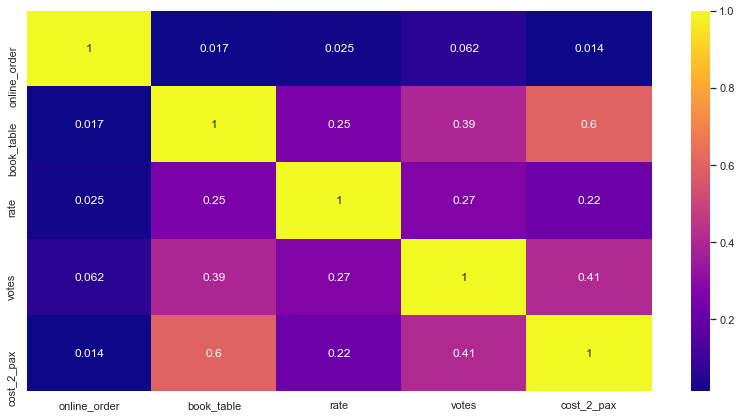

In [129]:
sns.heatmap(df_zom.corr(), annot = True, cmap = "plasma")
plt.show()

Concusions:

- Restaurants that provide the option to order online have an inverse relationship with the average 2 people cost.
- Restaurants that provide the option to book table in advance have a higher average cost.
- Rating is positively correlated to the votes obtained.

## Getting insights

In [130]:
# Plot votes vs rates

fig = px.scatter(df_zom, x= df_zom.rate, y = df_zom.votes, color=df_zom["votes"],
                 size= df_zom["votes"])
fig.show()

As we can see from the correlation matrix and the plot, the restaurants with a higher rating also happen to have more votes.

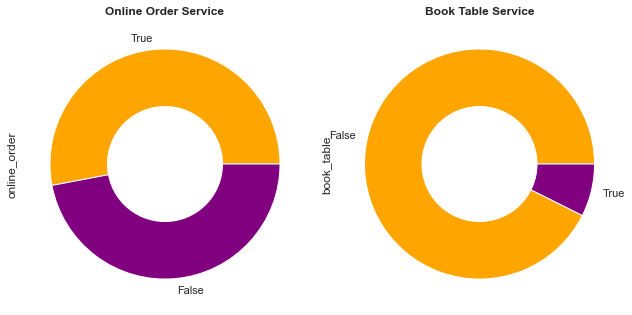

In [131]:
# Plot restaurant services

colors = ['orange', "purple"]

plt.rcParams['figure.figsize'] = 9,6
plt.subplot(1, 2, 1)
df_zom.online_order.value_counts().plot(kind='pie',colors=colors)
# add white circle to make donut plot
w_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Online Order Service',weight ='bold');

plt.subplot(1, 2, 2)
df_zom.book_table.value_counts().plot(kind='pie',colors=colors)
# add white circle to make donut plot
w_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Book Table Service', weight ='bold')
plt.tight_layout();
plt.rcParams['figure.figsize'] = 8,6

As we can see, the majority of restaurants offer the option to book a table in advance. Regarding the online order option, the difference is not that big, still, most restaurants do offer it.

In [132]:
# Cuisine trend per location

loc_cuisine = df_zom.groupby('location')['cuisines'].value_counts().sort_values(ascending=False)
ind = loc_cuisine.index.levels[0]
top_cuisine , rest_count =[],[]
for i in ind:
    top_cuisine.append(loc_cuisine[i].index[0])
    rest_count.append(loc_cuisine[i][0])
    
pd.DataFrame({'location':ind,'top_cuisine':top_cuisine,'rest_count':rest_count})

,location,top_cuisine,rest_count
0,BTM,North Indian,51
1,Banashankari,South Indian,34
2,Banaswadi,South Indian,12
3,Bannerghatta Road,"North Indian, Chinese",28
4,Basavanagudi,South Indian,34
...,...,...,...
87,West Bangalore,Fast Food,1
88,Whitefield,North Indian,67
89,Wilson Garden,Biryani,6
90,Yelahanka,Andhra,1


In [133]:
# Top 10 cuisines in Bangalore

df_zom["cuisines"].value_counts()[:10]

North Indian                           671
South Indian                           580
North Indian, Chinese                  537
Biryani                                259
Bakery, Desserts                       231
Fast Food                              229
South Indian, North Indian, Chinese    193
Bakery                                 178
Desserts                               165
Ice Cream, Desserts                    123
Name: cuisines, dtype: int64

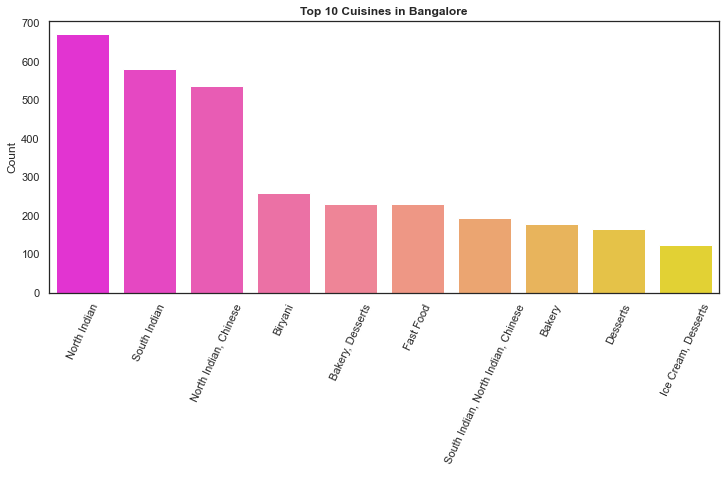

In [134]:
# Make the plot 

plt.rcParams['figure.figsize'] = 12,5
p = sns.countplot(x="cuisines", palette="spring", data=df_zom,
              order=df_zom["cuisines"].value_counts()[:10].index)
_ = plt.setp(p.get_xticklabels(), rotation=65)

plt.title('Top 10 Cuisines in Bangalore', weight='bold')
plt.xlabel(' ')
plt.ylabel('Count')
plt.show()

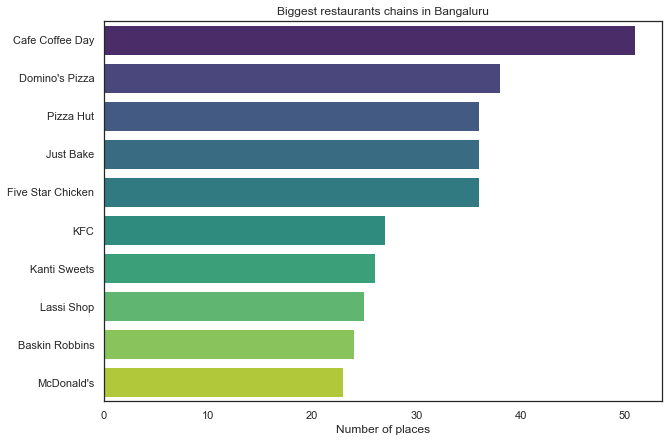

In [135]:
# Top 10 chains in Bangalore

plt.figure(figsize=(10,7))
chains=df_zom['name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='viridis')

plt.title("Biggest restaurants chains in Bangaluru")
plt.xlabel("Number of places")
plt.show()

## Text visualisation: World clouds

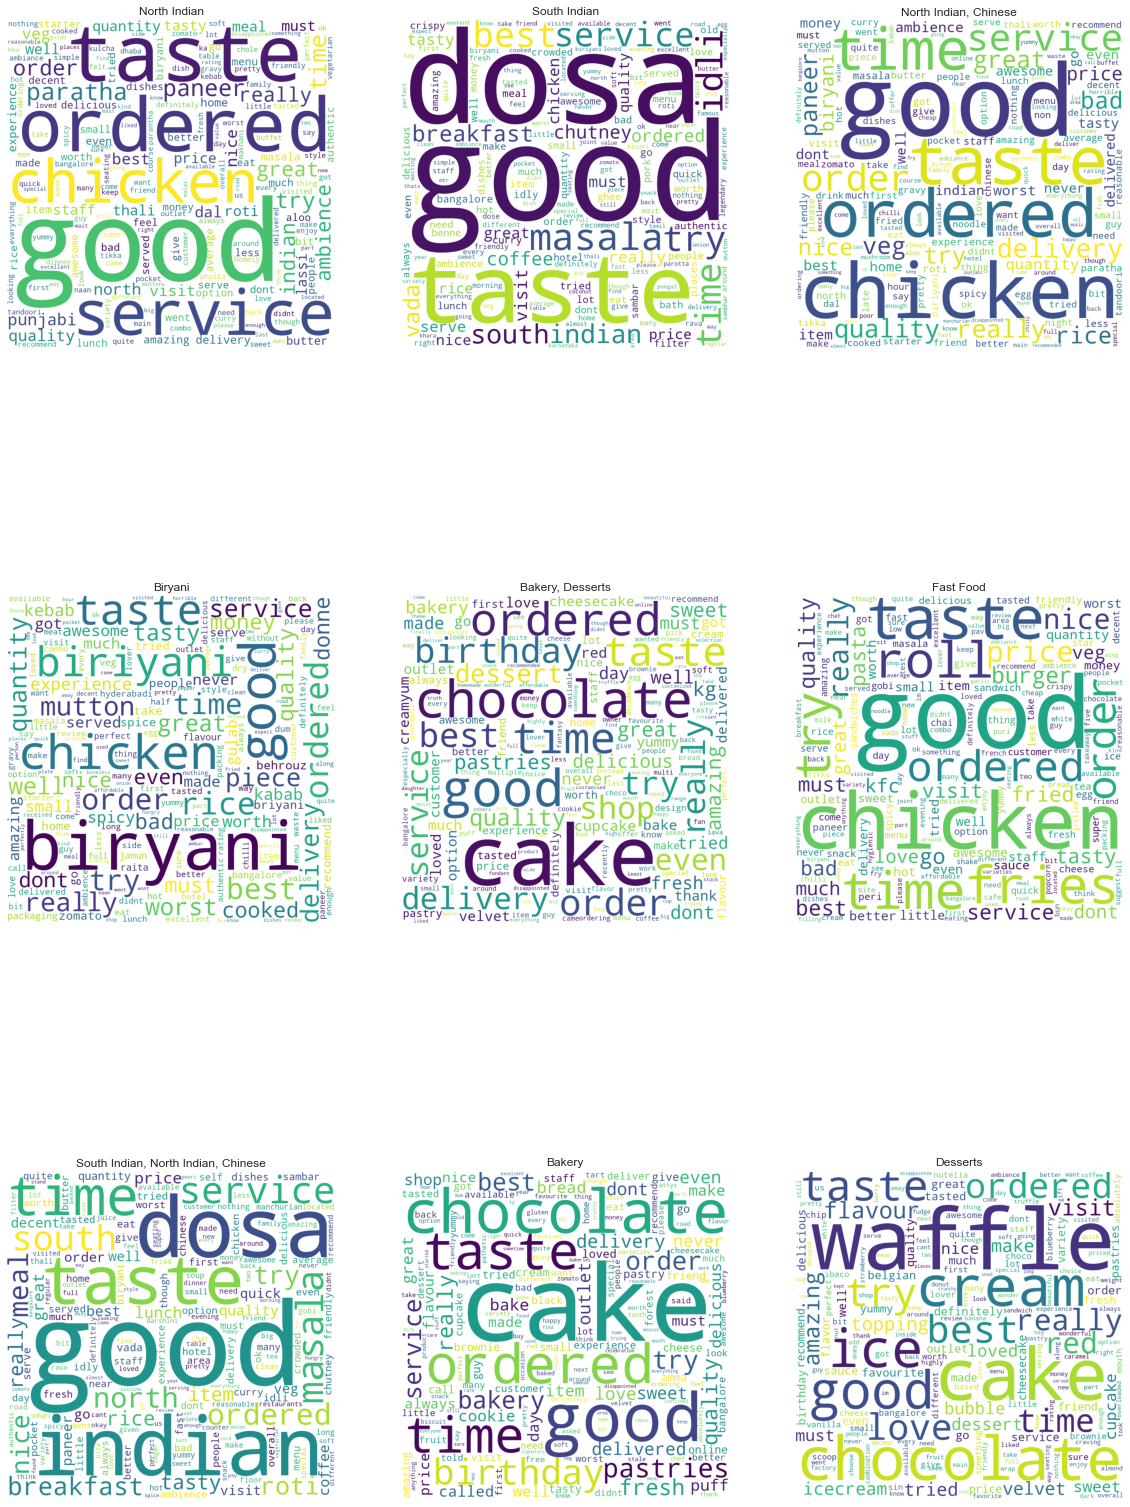

In [136]:
rest = df_zom['cuisines'].value_counts()[:9].index

def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=df_zom[df_zom['cuisines']==r]['reviews_list'].values.tolist()
        corpus=' '.join(x  for x in corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1000, height=1000).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        
produce_wordcloud(rest)

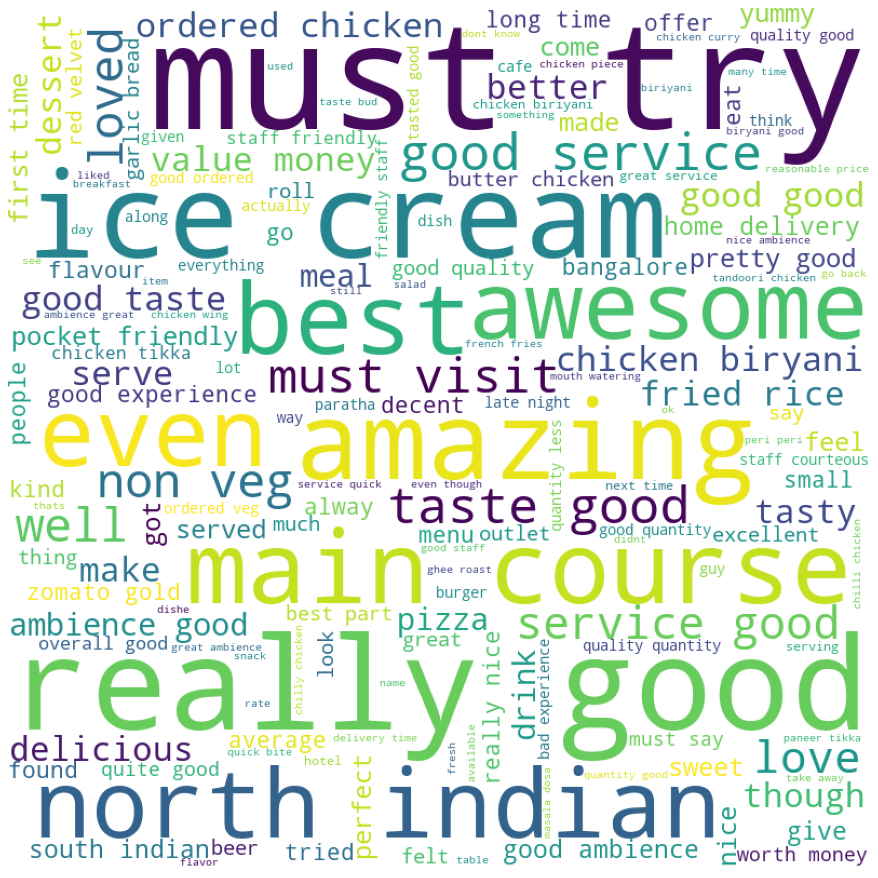

In [137]:
text = ' '.join(df_zom.reviews_list)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(text) 
                     
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 